Columns in the dataset: Index(['ID', 'Name', 'Age', 'Department', 'Salary', 'Joining_Date'], dtype='object')
Missing values in Age, Department, Gender, or Salary columns:
Age           0
Department    0
Salary        0
dtype: int64
                  ID            Age         Salary
count  100000.000000  100000.000000  100000.000000
mean    50000.500000      41.542190   89973.546040
std     28867.657797      13.844798   34700.446954
min         1.000000      18.000000   30000.000000
25%     25000.750000      30.000000   59854.000000
50%     50000.500000      42.000000   90088.500000
75%     75000.250000      54.000000  120102.250000
max    100000.000000      65.000000  150000.000000


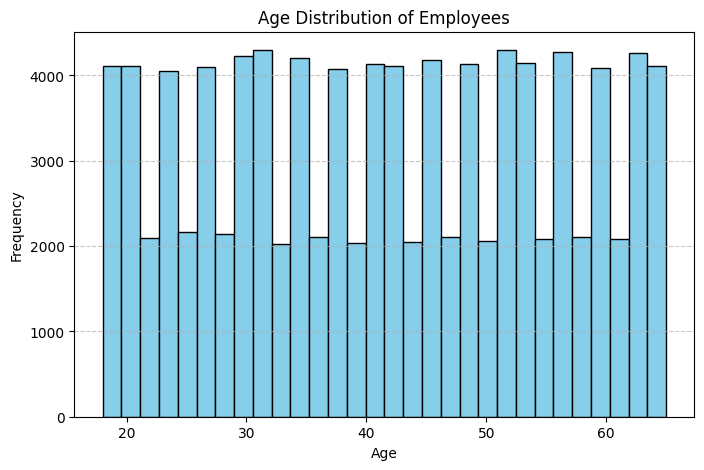

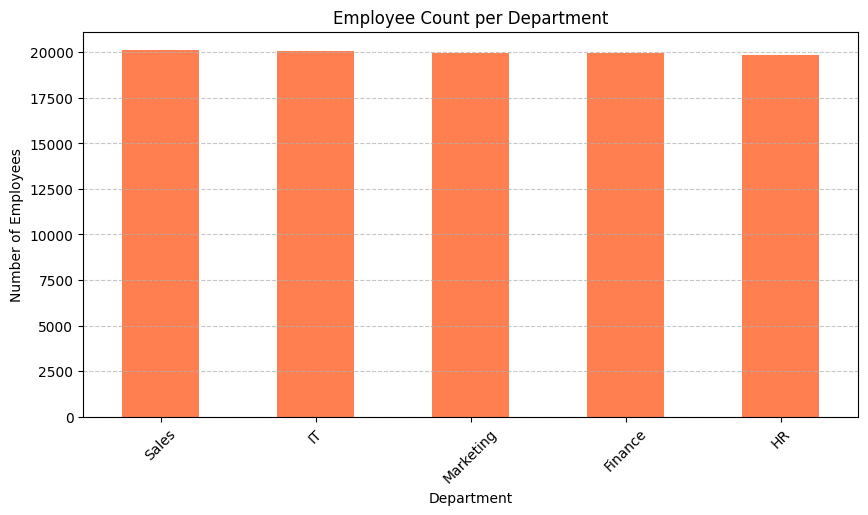

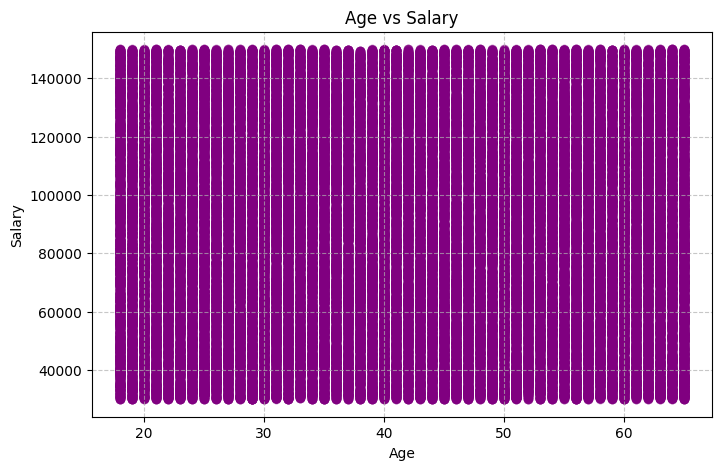

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the new path to the CSV file
file_path = r'C:\Users\ASUS\Music\VS Code\Python\employee_data.csv'

# Check if the file exists
if os.path.exists(file_path):
    # Load the employee dataset
    data = pd.read_csv(file_path)

    # Print column names to check for any issues
    print("Columns in the dataset:", data.columns)

    # Check if there are any missing values in essential columns
    print("Missing values in Age, Department, Gender, or Salary columns:")
    print(data[['Age', 'Department', 'Salary']].isnull().sum())

    # Basic statistics
    print(data.describe())

    # Ensure Age and Salary are numeric
    data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
    data['Salary'] = pd.to_numeric(data['Salary'], errors='coerce')

    # Check if 'Age', 'Department', and 'Gender' columns exist
    if 'Age' in data.columns and 'Department' in data.columns:
        # Histogram of employee ages
        plt.figure(figsize=(8, 5))
        plt.hist(data['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
        plt.xlabel('Age')
        plt.ylabel('Frequency')
        plt.title('Age Distribution of Employees')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # Bar chart of department-wise employee count
        dept_counts = data['Department'].value_counts()
        plt.figure(figsize=(10, 5))
        dept_counts.plot(kind='bar', color='coral')
        plt.xlabel('Department')
        plt.ylabel('Number of Employees')
        plt.title('Employee Count per Department')
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        # If 'Gender' column exists, plot the pie chart
        if 'Gender' in data.columns:
            gender_counts = data['Gender'].value_counts()
            plt.figure(figsize=(6, 6))
            gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=140)
            plt.title('Gender Distribution')
            plt.ylabel('')
            plt.show()

        # Scatter plot for Age vs. Salary
        plt.figure(figsize=(8, 5))
        plt.scatter(data['Age'], data['Salary'], color='purple', alpha=0.5)
        plt.xlabel('Age')
        plt.ylabel('Salary')
        plt.title('Age vs Salary')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("One or more required columns ('Age', 'Department') are missing.")
else:
    print(f"Error: The file '{file_path}' does not exist.")
